<a href="https://colab.research.google.com/github/mkap007/Python_For_Geospatial_Analysis/blob/main/Rainfall__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import math

In [17]:
data = pd.read_csv("/content/DataX.csv")

In [18]:
data.head(5)

,CID,Rainfall,Temperature,WaterVapor
0,1,139.416672,20.883333,1.780833
1,1,159.000000,23.875000,2.113333
2,1,266.583344,26.941666,2.601667
3,1,201.916672,18.375000,1.607500
4,1,182.666672,22.100000,1.954167


In [19]:
data.columns

Index(['CID', 'Rainfall', 'Temperature', 'WaterVapor'], dtype='object')

In [20]:
data.shape

(2951, 4)

In [21]:
data.corr()

,CID,Rainfall,Temperature,WaterVapor
CID,NaN,NaN,NaN,NaN
Rainfall,NaN,1.000000,0.660754,0.746042
Temperature,NaN,0.660754,1.000000,0.987063
WaterVapor,NaN,0.746042,0.987063,1.000000


In [22]:
data.describe()

,CID,Rainfall,Temperature,WaterVapor
count,2951.0,2951.000000,2951.000000,2951.000000
mean,1.0,198.117954,22.724853,2.050268
std,0.0,38.444811,2.975725,0.350537
min,1.0,123.000000,13.700000,1.163333
25%,1.0,167.291664,21.166666,1.840833
50%,1.0,191.333328,22.533333,1.987500
75%,1.0,225.041664,24.824999,2.282083
max,1.0,279.083344,27.591667,2.769167


In [23]:
correlation_matrix = data.corr()

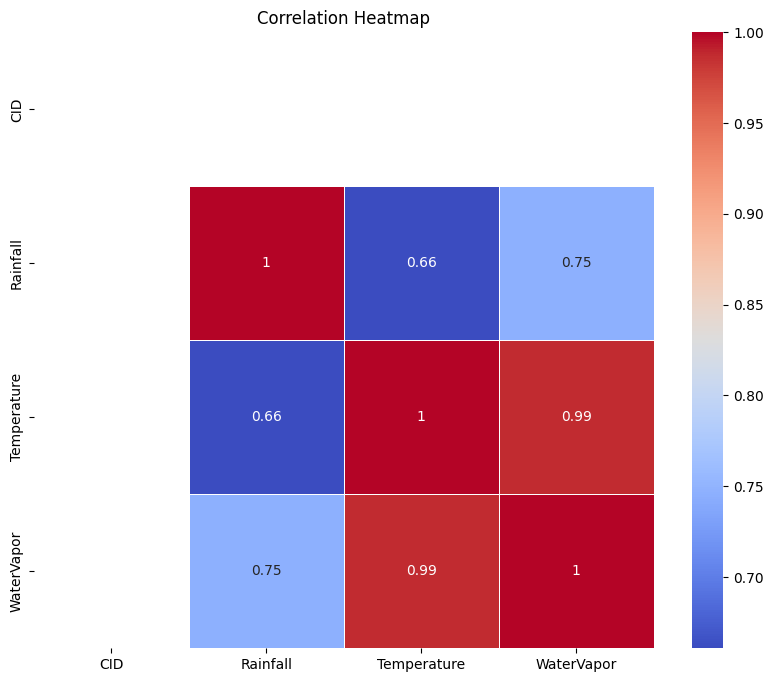

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [32]:
X = data.iloc[:, 1:4]

In [33]:
Y = data.Rainfall

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3, random_state= 42)

In [35]:
xtrain.shape

(2065, 3)

In [36]:
ytrain.shape

(2065,)

In [37]:
xtest.shape

(886, 3)

In [38]:
xtrain.head()

,Rainfall,Temperature,WaterVapor
2647,191.416672,22.941668,2.055833
1951,208.583328,24.833334,2.278333
788,138.416672,21.716667,1.877500
1068,163.416672,21.575001,1.902500
911,179.500000,22.799999,2.005000


In [39]:
xtrain=StandardScaler().fit_transform(xtrain)

In [40]:
xtest=StandardScaler().fit_transform(xtest)

In [41]:
model=LinearRegression().fit(xtrain,ytrain)

In [42]:
ypred=model.predict(xtest)

In [43]:
r2_score(ytest,ypred)

0.9943934762879005

In [44]:
mean_squared_error(ytest,ypred)

8.543938674361664

In [46]:
mean_absolute_error(ytest,ypred)

2.784307551920422

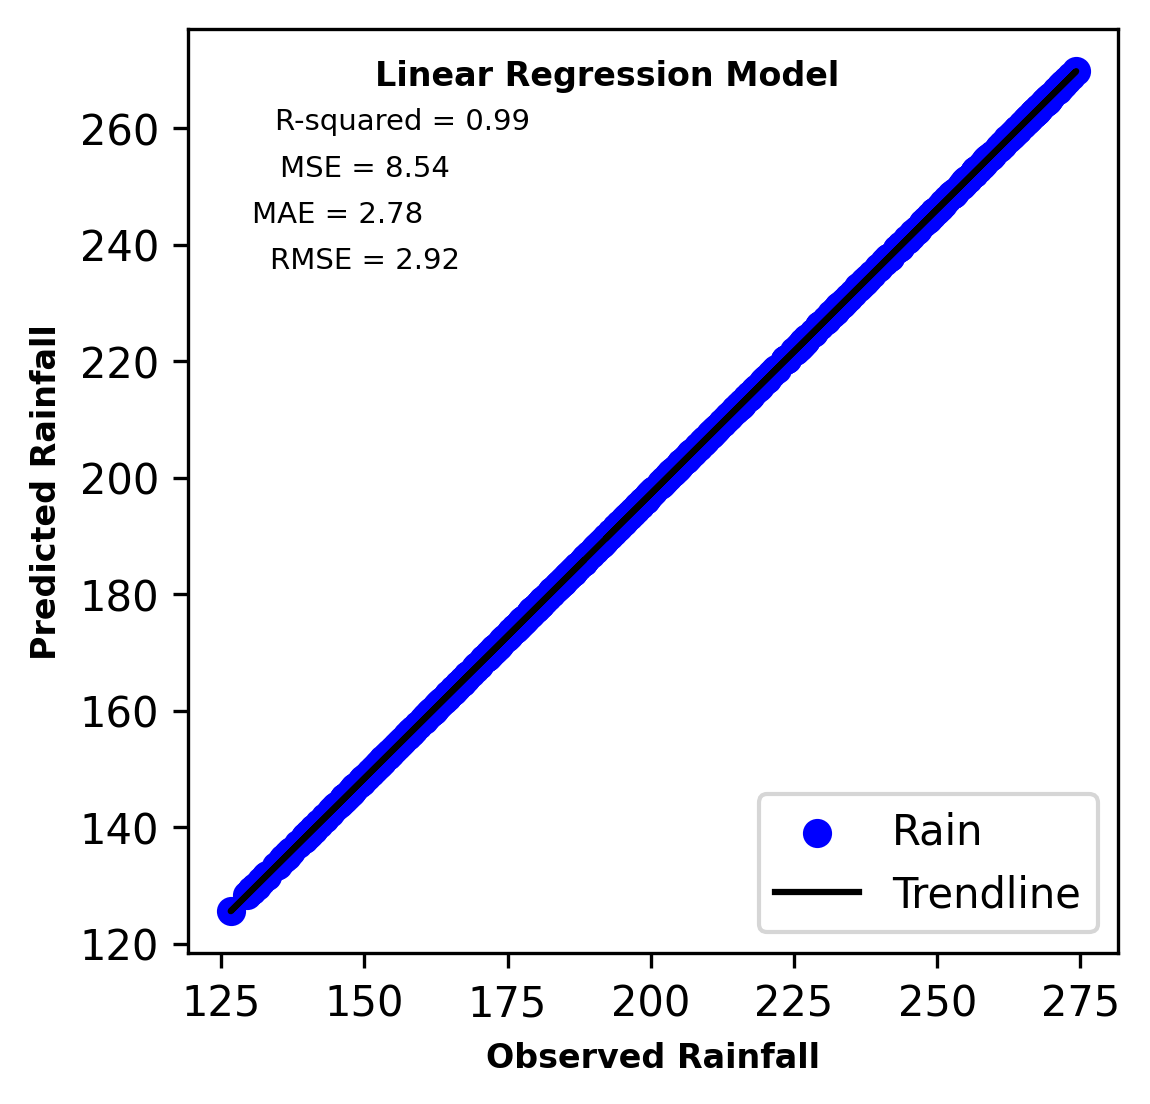

In [54]:


# create a scatter plot
colors = np.random.rand(1133)
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(ytest, ypred, label='Rain',color='blue')

# add a trend line
m, b = np.polyfit(ytest, ypred, 1)
plt.plot(ytest, m*np.array(ytest) + b, label='Trendline',color='black')

# add R-squared value to the plot
r_squared =r2_score(ytest, ypred)
rounded_r=round(r_squared,2)
MSE_score=round(mean_squared_error(ytest,ypred),2)
# Calculate MSE
Mae_score = round(mean_absolute_error(ytest,ypred),2)
# Calculate RMSE
Rmse_score = round(math.sqrt(MSE_score),2)
plt.text(0.45, 0.95, 'Linear Regression Model', ha='center', va='center', transform=plt.gca().transAxes,fontsize=8, color='black',fontweight='bold')
plt.text(0.23, 0.90, f'R-squared = {rounded_r}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')#,fontweight='bold')
plt.text(0.19, 0.85, f'MSE = {MSE_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')#,fontweight='bold')
plt.text(0.16, 0.80, f'MAE = {Mae_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')#,fontweight='bold')
plt.text(0.19, 0.75, f'RMSE = {Rmse_score}', ha='center', va='center', transform=plt.gca().transAxes,fontsize=7, color='black')#,fontweight='bold')

# add labels and title
plt.xlabel('Observed Rainfall',fontsize=8, color='black',fontweight='bold')
plt.ylabel('Predicted Rainfall',fontsize=8, color='black',fontweight='bold')
#plt.title('d)',fontsize=8, color='black')#,fontweight='bold')
plt.legend(loc='lower right')
# display the plot
plt.show()